<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/Assignment_2_1_Relaxation_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
N=21
d=2
epsilon=1
h=1
grad=-81/76
#initialization
potential_initial = np.zeros((N,N))
charge_density = np.zeros((N,N))


leftLimit=11
rightLimit =11 
for j in range(6,14):
  for i in range(0,N):
    if i>=leftLimit and i<=rightLimit :
      charge_density[i][j]=1
    # boundary initial
    elif((i==leftLimit and i==rightLimit) or (i==leftLimit and j==14)or (j==rightLimit and j==14)):
      potential_initial[i][j] = potential_initial[i+1][j]-h*grad+potential_initial[i][j-1]+h*(-grad)
    elif(i==leftLimit):
      potential_initial[i,j]=potential_initial[i+h,j]-grad*h
    elif(j==rightLimit):
      potential_initial[i,j]=potential_initial[i-h,j]+grad*h
  leftLimit -= 1
  rightLimit +=1
  
      

Text(0.5, 0.92, 'Initial charge density Distribution')

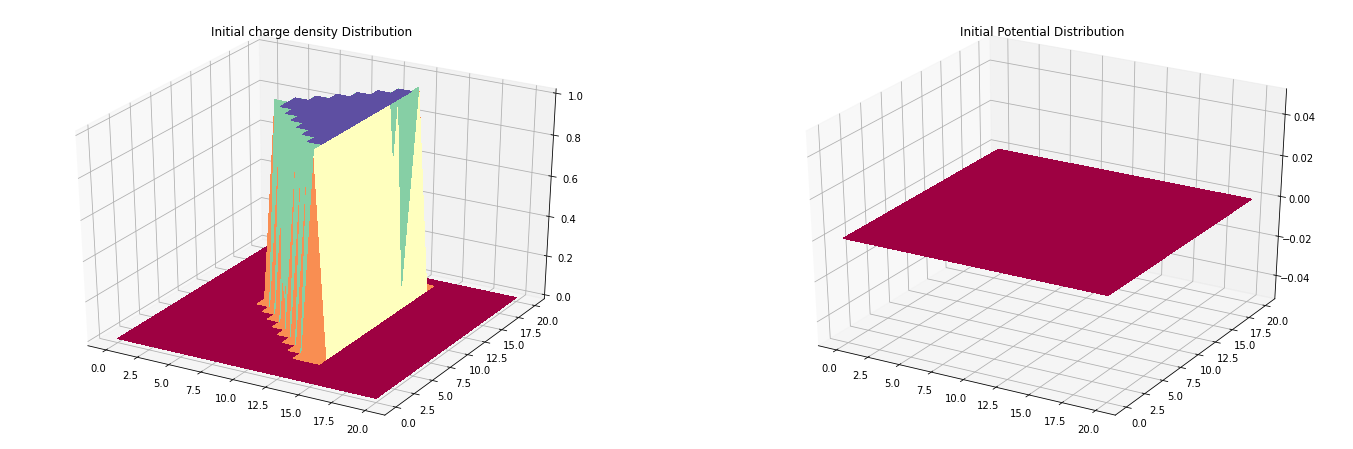

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_initial[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Initial Potential Distribution')


ax2_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
Z2_jr = charge_density[0:N,0:N]
surf3_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Initial charge density Distribution')

In [ ]:
# jacobi_relaxation
def jacobi_relaxation_triangle(bound_jr,leftLimit,rightLimit):
    iterations=0
    potential_here=copy.deepcopy(potential_initial) # pay attention to the difference between copy and deepcopy
    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here)  #set phi_new
        for j in range(1,N-1):
            for i in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                if i>leftLimit and i<rightLimit:
                  left_index=i-h
                  right_index=i+h
                  up_index=j+h
                  down_index=j-h
                  potential_new[i,j]=(1/(2*d))*(potential_here[i,up_index]+potential_here[i,down_index]+potential_here[right_index,j]
                                              +potential_here[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]
                # boundary iteration
                elif ((i==leftLimit and i==rightLimit) or (i==leftLimit and j==14)or (j==rightLimit and j==14)):
                  potential_new[i][j] = potential_initial[i+h][j]-h*grad+potential_initial[i][j-h]+h*(-grad)
                elif(i==leftLimit):
                  potential_new[i,j]=potential_initial[i+h,j]-grad*h
                elif(j==rightLimit):
                  potential_new[i,j]=potential_initial[i-h,j]+grad*h
                
            leftLimit -= 1
            rightLimit +=1 
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
        #print(iterations,max_delta)
    return iterations,potential_new

In [ ]:
iterations_jr_02,potential_jr_02=jacobi_relaxation_triangle(0.01,11,11)
iterations_jr_03,potential_jr_03=jacobi_relaxation_triangle(0.001,11,11)
iterations_jr_04,potential_jr_04=jacobi_relaxation_triangle(0.0001,11,11)

In [ ]:
print("interation amounts with delta 0f 0.01=" ,iterations_jr_02)
print("interation amounts with delta 0f 0.001=" ,iterations_jr_03)
print("interation amounts with delta 0f 0.0001=" ,iterations_jr_04)

interation amounts with delta 0f 0.01= 252
interation amounts with delta 0f 0.001= 438
interation amounts with delta 0f 0.0001= 624


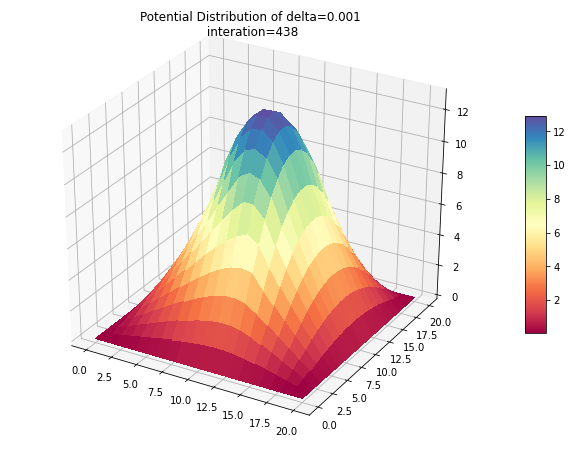

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_03[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Potential Distribution of delta=0.001\n interation='+str(iterations_jr_03))
fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

Text(0.5, 0.92, 'Potential Distribution of delta=0.0001\n interation=624')

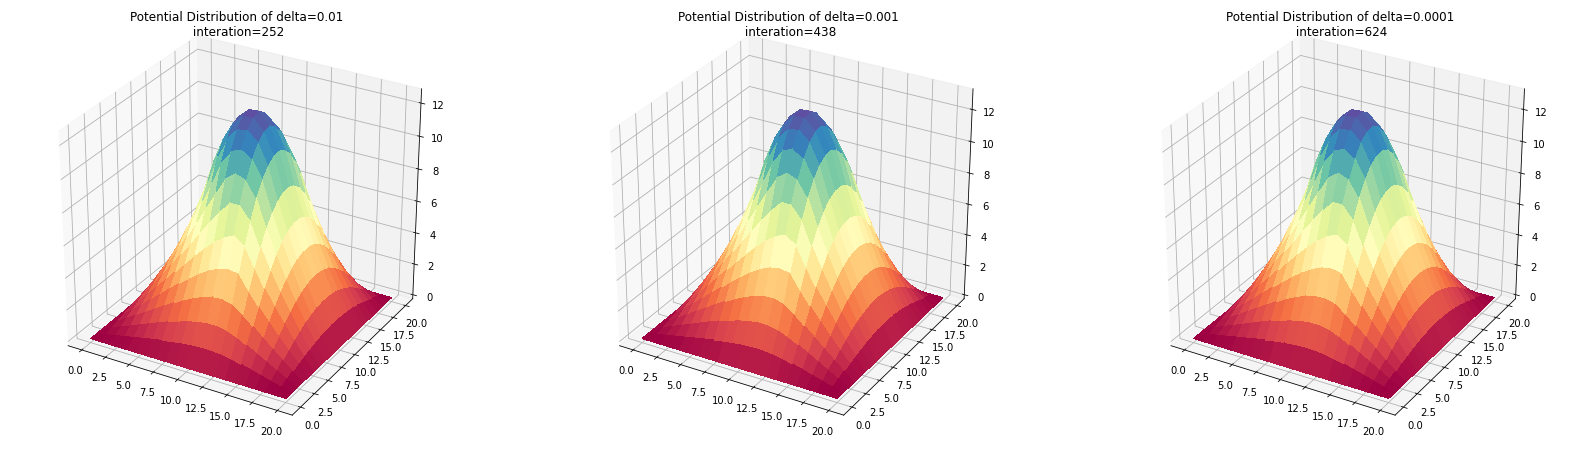

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(28,8))
ax1_jr = fig_jr.add_subplot(1, 3, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_02[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Potential Distribution of delta=0.01\n interation='+str(iterations_jr_02))
# fig_jr.colorbar(surf1_jr, shrink=0.5, aspect=10)

ax2_jr = fig_jr.add_subplot(1, 3, 2, projection='3d')
Z2_jr = potential_jr_03[0:N,0:N]
surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Potential Distribution of delta=0.001\n interation='+str(iterations_jr_03))
# fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

ax3_jr = fig_jr.add_subplot(1, 3, 3, projection='3d')
Z3_jr = potential_jr_03[0:N,0:N]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Potential Distribution of delta=0.0001\n interation='+str(iterations_jr_04))
# fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)


hexagon

In [ ]:
#initialization of hexagon
def initial_hexagon(N):
  potential_initial = np.zeros((N+3,N+3))
  charge_density = np.zeros((N+3,N+3))
  center=int((N+3)/2)
  for j in range(0,N+3):
    for i in range(0,N+3):
      if (i-center)**2+(j-center)**2<(N/2)**2 :
        charge_density[i][j]=1
  return potential_initial,charge_density

In [ ]:
#initial
d=2
epsilon=1
h=1

In [ ]:
def jacobi_relaxation(bound_jr,N,potential_initial,charge_density):
    iterations=0
    potential_here=copy.deepcopy(potential_initial) # pay attention to the difference between copy and deepcopy
    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here)  #set phi_new
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_new[i,j]=(1/(2*d))*(potential_here[i,up_index]+potential_here[i,down_index]+potential_here[right_index,j]
                                              +potential_here[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
        #print(iterations,max_delta)
    return iterations,potential_new

In [ ]:
def gauss_seidel_relaxation(bound_here,N,potential_initial,charge_density):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1/(2*d))*(potential_new[i,up_index]+potential_new[i,down_index]+potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [ ]:
def sor(bound_here,N,potential_initial,charge_density):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    rhere=np.cos(np.pi/(N-2))
    w_opt=2/(1+np.sqrt(1-rhere**2))
    print(w_opt)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1-w_opt)*potential_new[i,j]+w_opt*((1/(2*d))*(potential_new[i,up_index]
                                                                                   +potential_new[i,down_index]
                                                                                   +potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]) #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [ ]:
#N=10
N1=10
potential_initial_10,charge_density_10=initial_hexagon(N1)

#N=20
N2=20
potential_initial_20,charge_density_20=initial_hexagon(N2)

#N=30
N3=30
potential_initial_30,charge_density_30=initial_hexagon(N3)

#N=40
N4=40
potential_initial_40,charge_density_40=initial_hexagon(N4)

Text(0.5, 0.92, 'Initial charge density Distribution of size 10')

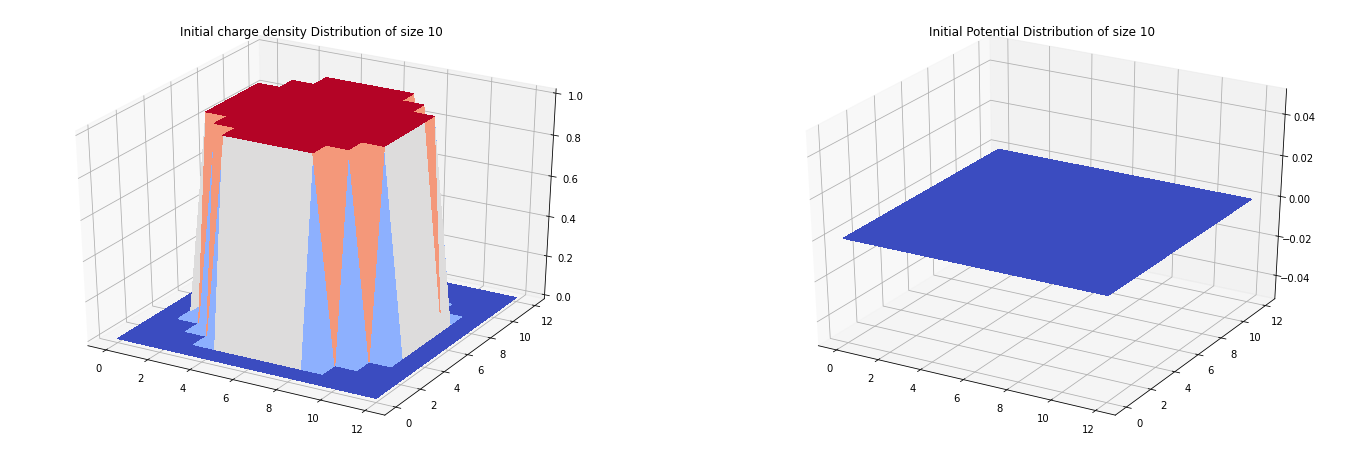

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
X1 = np.arange(0,N1+3)
Y1 = np.arange(0,N1+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_initial_10[0:N1+3,0:N1+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Initial Potential Distribution of size 10')


ax2_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
Z2_jr = charge_density_10[0:N1+3,0:N1+3]
surf3_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Initial charge density Distribution of size 10')

In [ ]:

iterations_jr_10,potential_jr_10=jacobi_relaxation(0.001,13,potential_initial_10,charge_density_10)
iterations_gs_10,potential_gs_10=gauss_seidel_relaxation(0.001,13,potential_initial_10,charge_density_10)
iterations_sor_10,potential_sor_10=sor(0.001,13,potential_initial_10,charge_density_10)


1.5603879212747742


In [ ]:
print(iterations_jr_10,iterations_gs_10,iterations_sor_10)

168 95 27


Text(0.5, 0.92, 'Successive Overrelaxation\n interation=27')

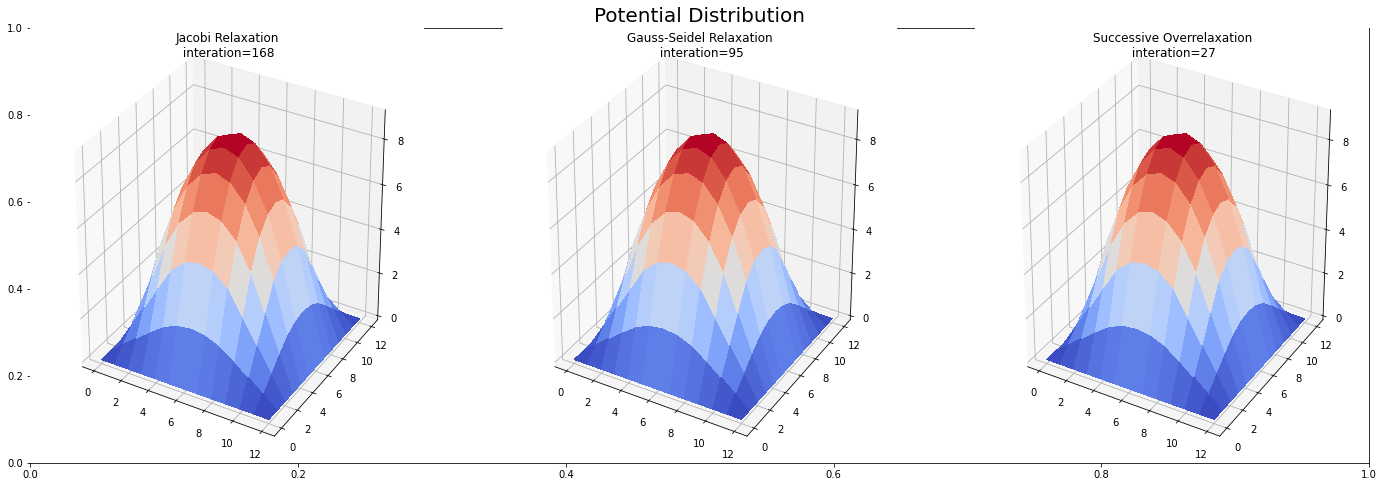

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
plt.title("Potential Distribution",size=20)
ax1_jr = fig_jr.add_subplot(1, 3, 1, projection='3d')
X1 = np.arange(0,N1+3)
Y1 = np.arange(0,N1+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_10[0:N1+3,0:N1+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Jacobi Relaxation\n interation='+str(iterations_jr_10))




ax2_jr = fig_jr.add_subplot(1, 3, 2, projection='3d')
Z2_jr = potential_gs_10[0:N1+3,0:N1+3]
surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Gauss-Seidel Relaxation\n interation='+str(iterations_gs_10))


ax3_jr = fig_jr.add_subplot(1, 3, 3, projection='3d')
Z3_jr = potential_sor_10[0:N1+3,0:N1+3]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Successive Overrelaxation\n interation='+str(iterations_sor_10))



Text(0.5, 0.92, 'Initial charge density Distribution of size 20')

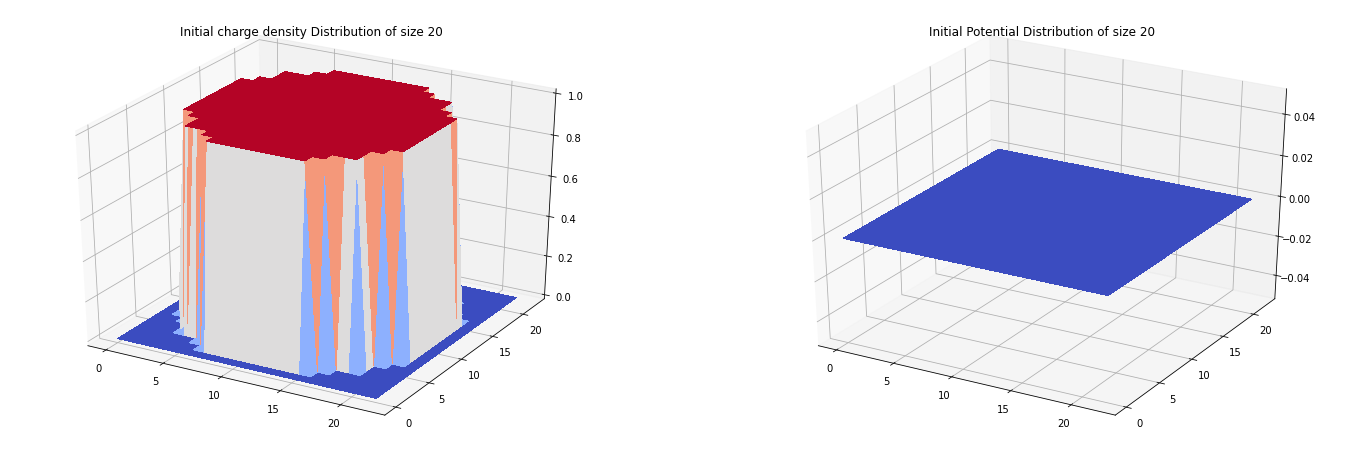

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
X1 = np.arange(0,N2+3)
Y1 = np.arange(0,N2+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_initial_20[0:N2+3,0:N2+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Initial Potential Distribution of size 20')


ax2_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
Z2_jr = charge_density_20[0:N2+3,0:N2+3]
surf3_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Initial charge density Distribution of size 20')

In [ ]:
iterations_jr_20,potential_jr_20=jacobi_relaxation(0.001,23,potential_initial_20,charge_density_20)
iterations_gs_20,potential_gs_20=gauss_seidel_relaxation(0.001,23,potential_initial_20,charge_density_20)
iterations_sor_20,potential_sor_20=sor(0.001,23,potential_initial_20,charge_density_20)

1.7405800107385725


In [ ]:
print(iterations_jr_20,iterations_gs_20,iterations_sor_20)

579 324 50


Text(0.5, 0.92, 'Successive Overrelaxation\n interation=50')

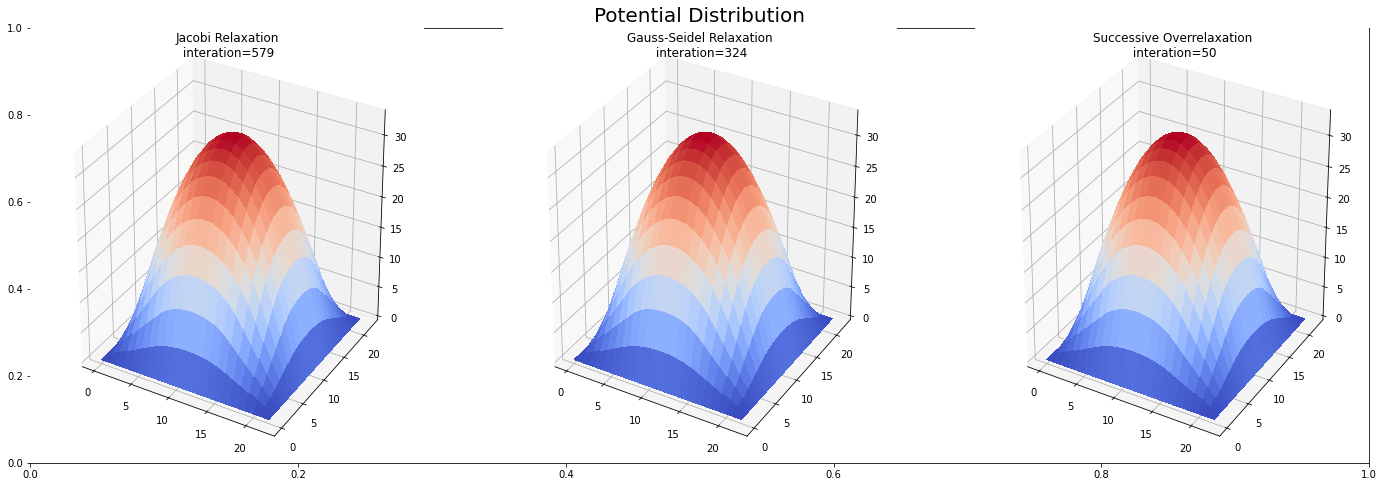

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
plt.title("Potential Distribution",size=20)
ax1_jr = fig_jr.add_subplot(1, 3, 1, projection='3d')
X1 = np.arange(0,N2+3)
Y1 = np.arange(0,N2+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_20[0:N2+3,0:N2+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Jacobi Relaxation\n interation='+str(iterations_jr_20))


ax2_jr = fig_jr.add_subplot(1, 3, 2, projection='3d')
Z2_jr = potential_gs_20[0:N2+3,0:N2+3]
surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Gauss-Seidel Relaxation\n interation='+str(iterations_gs_20))


ax3_jr = fig_jr.add_subplot(1, 3, 3, projection='3d')
Z3_jr = potential_sor_20[0:N2+3,0:N2+3]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Successive Overrelaxation\n interation='+str(iterations_sor_20))


Text(0.5, 0.92, 'Initial charge density Distribution of size 30')

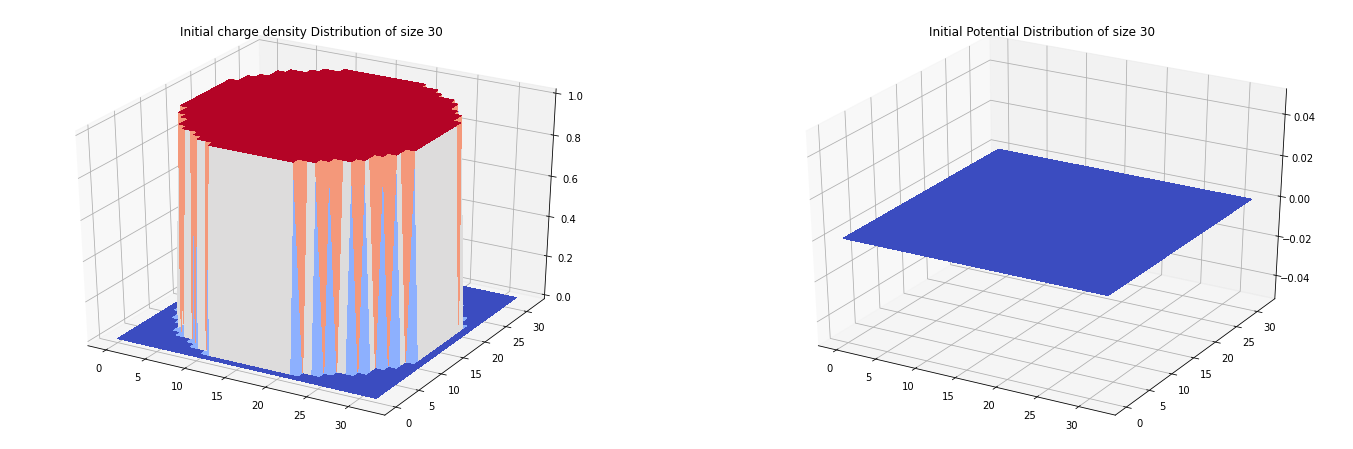

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
X1 = np.arange(0,N3+3)
Y1 = np.arange(0,N3+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_initial_30[0:N3+3,0:N3+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Initial Potential Distribution of size 30')


ax2_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
Z2_jr = charge_density_30[0:N3+3,0:N3+3]
surf3_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Initial charge density Distribution of size 30')

In [ ]:

iterations_jr_30,potential_jr_30=jacobi_relaxation(0.001,33,potential_initial_30,charge_density_30)
iterations_gs_30,potential_gs_30=gauss_seidel_relaxation(0.001,33,potential_initial_30,charge_density_30)
iterations_sor_30,potential_sor_30=sor(0.001,33,potential_initial_30,charge_density_30)

1.8162527563363982


In [ ]:
print(iterations_jr_30,iterations_gs_30,iterations_sor_30)

1230 688 73


Text(0.5, 0.92, 'Successive Overrelaxation\n interation=73')

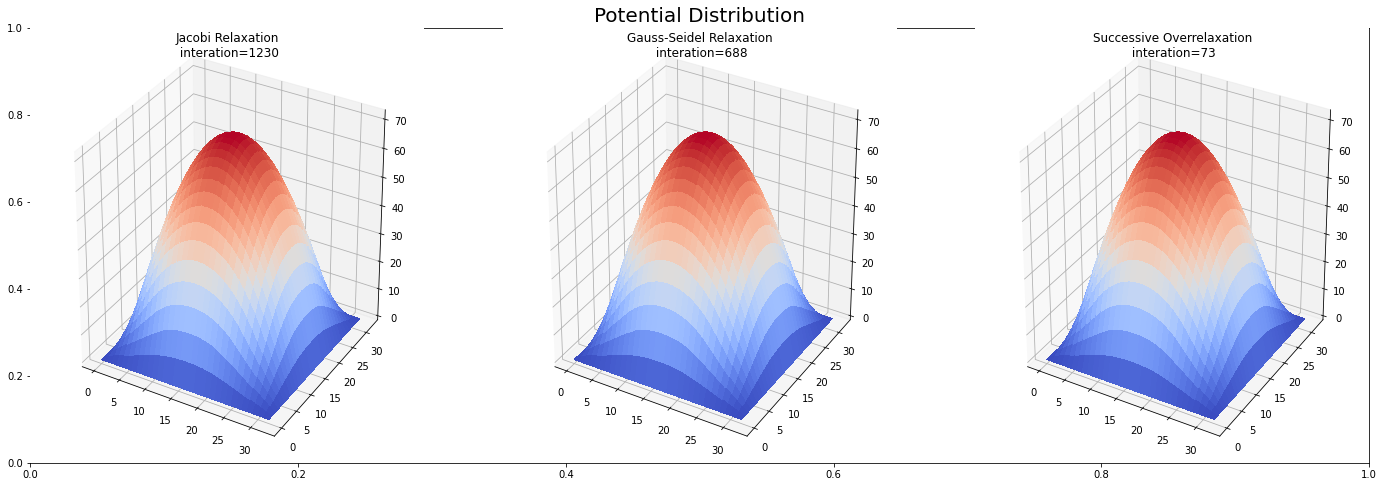

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
plt.title("Potential Distribution",size=20)
ax1_jr = fig_jr.add_subplot(1, 3, 1, projection='3d')
X1 = np.arange(0,N3+3)
Y1 = np.arange(0,N3+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_30[0:N3+3,0:N3+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Jacobi Relaxation\n interation='+str(iterations_jr_30))


ax2_jr = fig_jr.add_subplot(1, 3, 2, projection='3d')
Z2_jr = potential_gs_30[0:N3+3,0:N3+3]
surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Gauss-Seidel Relaxation\n interation='+str(iterations_gs_30))


ax3_jr = fig_jr.add_subplot(1, 3, 3, projection='3d')
Z3_jr = potential_sor_30[0:N3+3,0:N3+3]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Successive Overrelaxation\n interation='+str(iterations_sor_30))


Text(0.5, 0.92, 'Initial charge density Distribution of size 40')

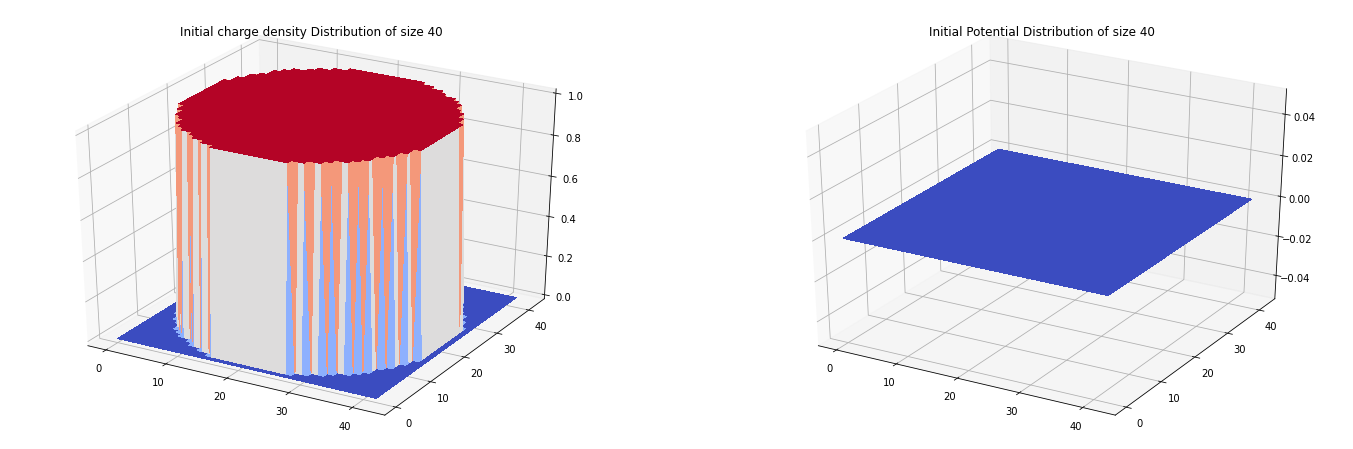

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
ax1_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
X1 = np.arange(0,N4+3)
Y1 = np.arange(0,N4+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_initial_40[0:N4+3,0:N4+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Initial Potential Distribution of size 40')


ax2_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
Z2_jr = charge_density_40[0:N4+3,0:N4+3]
surf3_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Initial charge density Distribution of size 40')

In [ ]:
iterations_jr_40,potential_jr_40=jacobi_relaxation(0.001,43,potential_initial_40,charge_density_40)
iterations_gs_40,potential_gs_40=gauss_seidel_relaxation(0.001,43,potential_initial_40,charge_density_40)
iterations_sor_40,potential_sor_40=sor(0.001,43,potential_initial_40,charge_density_40)


1.857787736817793


In [ ]:
print(iterations_jr_40,iterations_gs_40,iterations_sor_40)

2123 1186 97


Text(0.5, 0.92, 'Successive Overrelaxation\n interation=97')

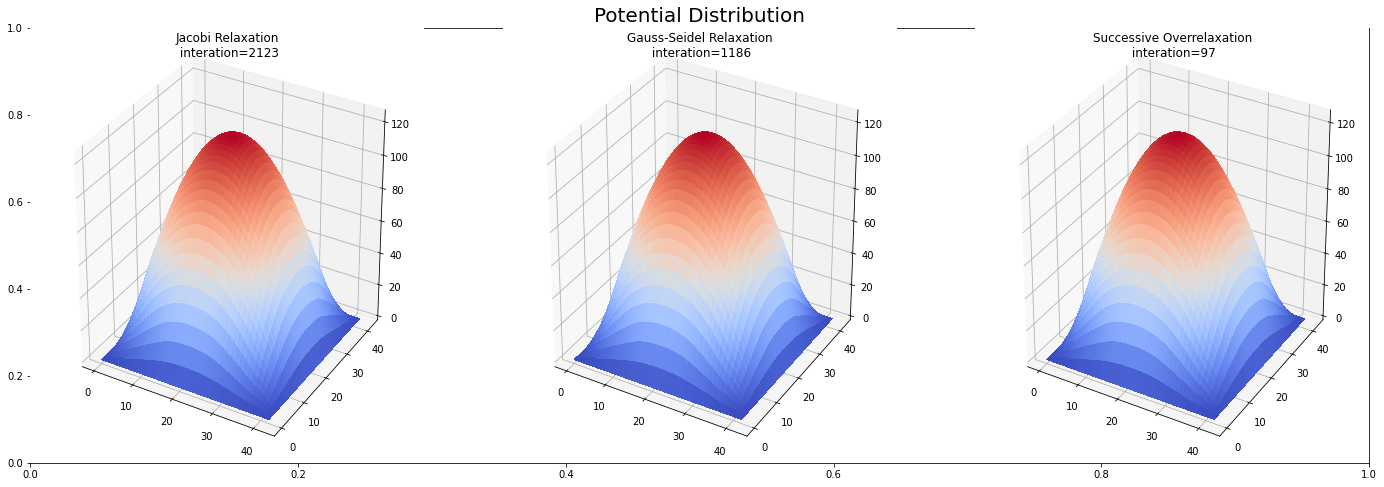

In [ ]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(24,8))
plt.title("Potential Distribution",size=20)
ax1_jr = fig_jr.add_subplot(1, 3, 1, projection='3d')
X1 = np.arange(0,N4+3)
Y1 = np.arange(0,N4+3)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = potential_jr_40[0:N4+3,0:N4+3]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Jacobi Relaxation\n interation='+str(iterations_jr_40))


ax2_jr = fig_jr.add_subplot(1, 3, 2, projection='3d')
Z2_jr = potential_gs_40[0:N4+3,0:N4+3]
surf2_jr = ax2_jr.plot_surface(X1, Y1, Z2_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2_jr.set_title('Gauss-Seidel Relaxation\n interation='+str(iterations_gs_40))


ax3_jr = fig_jr.add_subplot(1, 3, 3, projection='3d')
Z3_jr = potential_sor_40[0:N4+4,0:N4+3]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Successive Overrelaxation\n interation='+str(iterations_sor_40))
